## Clustering Gym Members Based on Workout Type Using Hierarchical Clustering

### Introduction
In this project, we aim to cluster gym members based on their workout type using hierarchical clustering. This technique helps us identify groups of gym members who have similar workout patterns, which can be useful for personalized workout programs or targeted promotions.

### Goals:
1. Understand the similarities in workout types among gym members.
2. Use hierarchical clustering to group the members into clusters.
3. Visualize and analyze the clusters.

#### Import neccessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('E:/ML projects/Workspace/dataset/gym_members_exercise_tracking.csv')

In [6]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [8]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [10]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


#### Converting the categorical col to numerical

In [11]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [13]:
df['Gender'].unique()

array([0, 1])

In [14]:
df['Workout_Type'].unique()

array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

In [15]:
df['Workout_Type']=df['Workout_Type'].map({'Yoga':0, 'HIIT':1, 'Cardio':2, 'Strength':3})

In [16]:
df['Workout_Type'].unique()

array([0, 1, 2, 3])

#### Checking for null values

In [20]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

#### Taking the data to analyze exclude target

In [17]:
x=df.drop(['Workout_Type'],axis=1)

In [18]:
x

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,0,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20
1,46,1,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00
2,32,1,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71
3,25,0,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41
4,38,0,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,0,87.1,1.74,187,158,67,1.57,1364.0,10.0,3.5,4,3,28.77
969,25,0,66.6,1.61,184,166,56,1.38,1260.0,25.0,3.0,2,1,25.69
970,59,1,60.4,1.76,194,120,53,1.72,929.0,18.8,2.7,5,3,19.50
971,32,0,126.4,1.83,198,146,62,1.10,883.0,28.2,2.1,3,2,37.74


#### Standardization

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [22]:
scaler

StandardScaler()

In [23]:
x_scaled=scaler.fit_transform(x)

In [24]:
x_scaled

array([[ 1.42234256, -0.95084677,  0.6814925 , ...,  0.74329509,
         1.60978416,  0.7942783 ],
       [ 0.60096485,  1.05169416,  0.04931563, ...,  0.74329509,
         0.25717623,  1.06465186],
       [-0.54896396,  1.05169416, -0.27149054, ...,  0.74329509,
         0.25717623, -0.03036106],
       ...,
       [ 1.66875588,  1.05169416, -0.63475635, ...,  1.83909224,
         1.60978416, -0.81294232],
       [-0.54896396, -0.95084677,  2.47895061, ..., -0.35250206,
         0.25717623,  1.92684311],
       [ 0.60096485, -0.95084677,  0.70036345, ..., -1.44829922,
        -1.09543171,  1.27193826]])

#### Using Principal component analysis to reduce the features

In [25]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [26]:
pca

PCA(n_components=2)

In [27]:
pca_scaled=pca.fit_transform(x_scaled)

In [28]:
pca_scaled

array([[ 3.72012734,  0.37114919],
       [-0.75949947, -1.15467602],
       [-1.27265286, -0.99722365],
       ...,
       [ 1.86906388, -2.01728255],
       [ 0.21117496,  2.567055  ],
       [-1.57142658,  2.59602985]])

#### Before Hierarchical clusturing

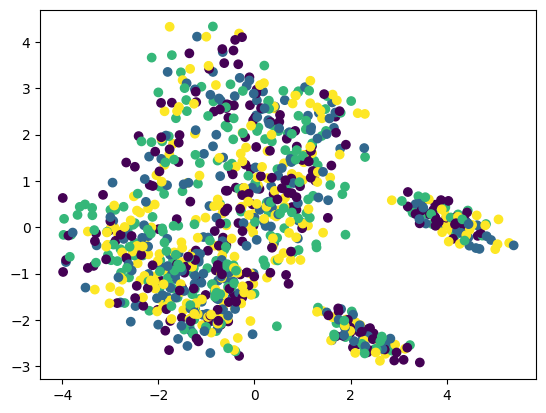

In [29]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=df.Workout_Type)

#### Dendogram

Text(0, 0.5, 'Euclidian Distance')

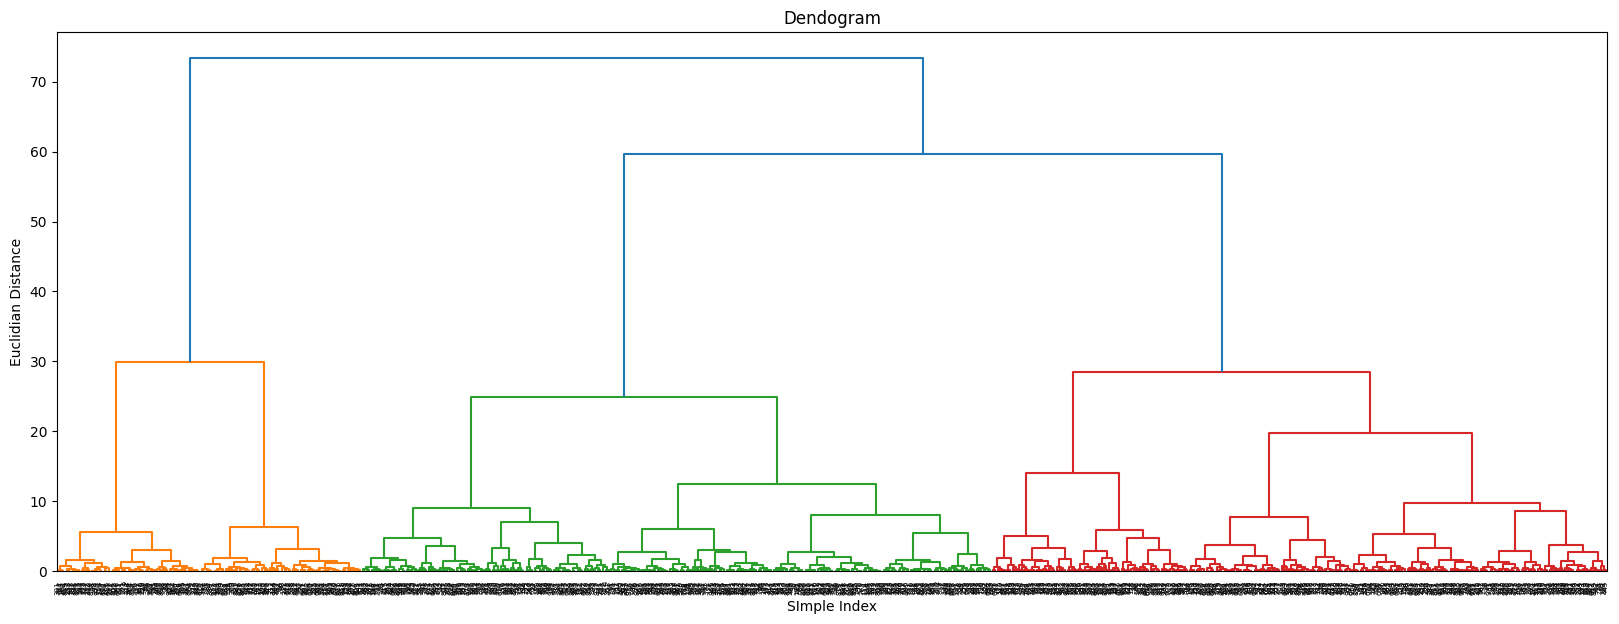

In [30]:
#Agglomerative clusturing
#To construct a dendogram
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))
plt.title("Dendogram")
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.xlabel('SImple Index')
plt.ylabel('Euclidian Distance')

#### Model training 

In [48]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')

In [49]:
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [50]:
cluster.labels_

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

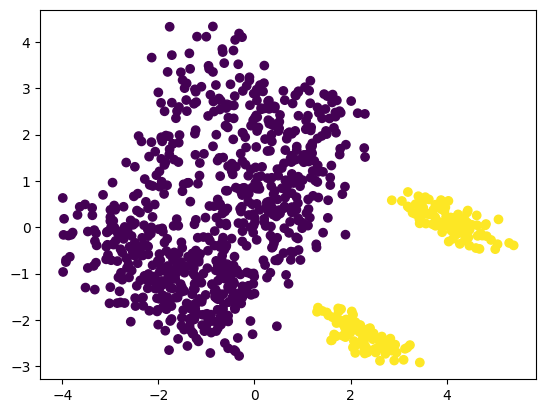

In [51]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)